In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import os
import gc

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold

# model
from sklearn.ensemble import RandomForestRegressor

SEED=42

In [4]:
path = 'drive/My Drive/bigcontest2019/data/'
print(os.listdir(path + 'train'),'\n', 
      os.listdir(path + 'test'),'\n', 
#       os.listdir(path + '../metrics'),'\n', 
      os.listdir(path + '../scripts'))

['train_payment.csv', 'train_trade.csv', 'train_pledge.csv', 'train_combat.csv', 'train_label.csv', 'train_activity.csv', 'train_merge_bjw.csv'] 
 ['test1_activity.csv', 'test1_combat.csv', 'test2_activity.csv', 'test1_pledge.csv', 'test2_combat.csv', 'test2_trade.csv', 'test1_trade.csv', 'test1_payment.csv', 'test2_payment.csv', 'test2_pledge.csv'] 
 ['explortary data', 'model', 'data merge', 'test1_pred.csv', 'test1_predict.csv']


In [0]:
train_label = pd.read_csv(path + 'train/train_label.csv')
train_activity = pd.read_csv(path + 'train/train_activity.csv')
train_combat = pd.read_csv(path + 'train/train_combat.csv')
train_payment = pd.read_csv(path + 'train/train_payment.csv')
train_pledge = pd.read_csv(path + 'train/train_pledge.csv')
train_trade = pd.read_csv(path + 'train/train_trade.csv')

test1_activity = pd.read_csv(path + 'test/test1_activity.csv')
test1_combat = pd.read_csv(path + 'test/test1_combat.csv')
test1_payment = pd.read_csv(path + 'test/test1_payment.csv')
test1_pledge = pd.read_csv(path + 'test/test1_pledge.csv')
test1_trade = pd.read_csv(path + 'test/test1_trade.csv')

test2_activity = pd.read_csv(path + 'test/test2_activity.csv')
test2_combat = pd.read_csv(path + 'test/test2_combat.csv')
test2_payment = pd.read_csv(path + 'test/test2_payment.csv')
test2_pledge = pd.read_csv(path + 'test/test2_pledge.csv')
test2_trade = pd.read_csv(path + 'test/test2_trade.csv')

FileNotFoundError: ignored

In [0]:
train_activity_merge = train_activity.groupby('acc_id').agg({'day':'nunique', 
                                                             'char_id':'nunique',
                                                             'server':'nunique', 
                                                             'playtime':'sum', 
                                                             'npc_kill':'sum', 
                                                             'solo_exp':'sum',
                                                             'party_exp':'sum', 
                                                             'quest_exp':'sum',
                                                             'rich_monster':'sum', 
                                                             'death':'sum', 
                                                             'revive':'sum',
                                                             'exp_recovery':'sum',
                                                             'fishing':'sum',
                                                             'private_shop':'sum',
                                                             'game_money_change':'sum',
                                                             'enchant_count':'sum'}).reset_index(drop=True)

test1_activity_merge = test1_activity.groupby('acc_id').agg({'day':'nunique', 
                                                             'char_id':'nunique',
                                                             'server':'nunique', 
                                                             'playtime':'sum', 
                                                             'npc_kill':'sum', 
                                                             'solo_exp':'sum',
                                                             'party_exp':'sum', 
                                                             'quest_exp':'sum',
                                                             'rich_monster':'sum', 
                                                             'death':'sum', 
                                                             'revive':'sum',
                                                             'exp_recovery':'sum',
                                                             'fishing':'sum',
                                                             'private_shop':'sum',
                                                             'game_money_change':'sum',
                                                             'enchant_count':'sum'}).reset_index(drop=True)

test2_activity_merge = test2_activity.groupby('acc_id').agg({'day':'nunique', 
                                                             'char_id':'nunique',
                                                             'server':'nunique', 
                                                             'playtime':'sum', 
                                                             'npc_kill':'sum', 
                                                             'solo_exp':'sum',
                                                             'party_exp':'sum', 
                                                             'quest_exp':'sum',
                                                             'rich_monster':'sum', 
                                                             'death':'sum', 
                                                             'revive':'sum',
                                                             'exp_recovery':'sum',
                                                             'fishing':'sum',
                                                             'private_shop':'sum',
                                                             'game_money_change':'sum',
                                                             'enchant_count':'sum'}).reset_index(drop=True)

In [0]:
def week_transform(row):

    if row>0 and row<8:
        row = 1
    elif row>7 and row<15:
        row = 2
    elif row>14 and row<22:
        row = 3
    else:
        row = 4
    
    return row

In [0]:
train_payment['day'] = train_payment['day'].apply(week_transform)
train_payment_merge = train_payment.groupby(['acc_id', 'day']).sum().unstack()
train_payment_merge.columns = ['week1', 'week2', 'week3', 'week4']
train_merge = pd.concat([train_activity_merge, train_payment_merge.fillna(0).reset_index(drop=True)], 1)

test1_payment['day'] = test1_payment['day'].apply(week_transform)
test1_payment_merge = test1_payment.groupby(['acc_id', 'day']).sum().unstack()
test1_payment_merge.columns = ['week1', 'week2', 'week3', 'week4']
test1_merge = pd.concat([test1_activity_merge, test1_payment_merge.fillna(0).reset_index(drop=True)], 1)

test2_payment['day'] = test2_payment['day'].apply(week_transform)
test2_payment_merge = test2_payment.groupby(['acc_id', 'day']).sum().unstack()
test2_payment_merge.columns = ['week1', 'week2', 'week3', 'week4']
test2_merge = pd.concat([test2_activity_merge, test2_payment_merge.fillna(0).reset_index(drop=True)], 1)

ValueError: ignored

In [0]:
test2_merge.head()

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
import lightgbm as lgb

In [0]:
import xgboost as xgb 


In [0]:
FOLDS=5;SEED=42
def xgb_model(train, test, label, folds=FOLDS, seed=SEED):
    
    params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
             }
    num_rounds = 50
    
    skf = StratifiedKFold(n_splits=folds, random_state=seed)
    kf = KFold(n_splits=folds, random_state=seed)
    
    oof_time = np.zeros(len(train))
    oof_spent = np.zeros(len(train))
    pred_time = np.zeros(len(test))
    pred_spent = np.zeros(len(test))
    
    for trn_idx, val_idx in skf.split(train, label['survival_time']):
        
        train_df = lgb.Dataset(train.loc[trn_idx], label=label.loc[trn_idx, 'survival_time'])
        valid_df = lgb.Dataset(train.loc[val_idx], label=label.loc[val_idx, 'survival_time'])
        
        lgb_model = lgb.train(params, train_df, 5000, valid_sets = [train_df, valid_df], early_stopping_rounds = 500, verbose_eval=5000)
        oof_time[val_idx] = lgb_model.predict(train.loc[val_idx])/skf.n_splits
        pred_time += lgb_model.predict(test)/skf.n_splits
    
    
    for trn_idx, val_idx in kf.split(train):
        
        train_df = lgb.Dataset(train.loc[trn_idx], label=label.loc[trn_idx, 'amount_spent'])
        valid_df = lgb.Dataset(train.loc[val_idx], label=label.loc[val_idx, 'amount_spent'])
        
        lgb_model = lgb.train(params, train_df, 5000, valid_sets = [train_df, valid_df], early_stopping_rounds = 500, verbose_eval=5000)
        oof_spent[val_idx] = lgb_model.predict(train.loc[val_idx])/skf.n_splits
        pred_spent += lgb_model.predict(test)/kf.n_splits
        
    
    return oof_time, oof_spent, pred_time, pred_spent

In [0]:
FOLDS=5;SEED=42
def lgb_model(train, test, label, folds=FOLDS, seed=SEED):
    
    params = {
        'objective':'regression',
        "boosting": "gbdt",
        "num_iterations ":100,
        'num_leaves': 10000,
        'max_depth': 8,
        'learning_rate': 0.1,
        'min_data_in_leaf': 32, 
        'min_child_samples': 30,
        'min_child_weight': 0.5,
        'min_split_gain': 0.005,
        "feature_fraction": 0.9,
        "bagging_fraction": 0.9 ,
        "bagging_freq": 2,
        "bagging_seed": 42,
        "metric": 'rmse',
        "lambda_l1": 0.1,
        "lambda_l2": 0.1
    }
    
    skf = StratifiedKFold(n_splits=folds, random_state=seed)
    kf = KFold(n_splits=folds, random_state=seed)
    
    oof_time = np.zeros(len(train))
    oof_spent = np.zeros(len(train))
    pred_time = np.zeros(len(test))
    pred_spent = np.zeros(len(test))
    
    for trn_idx, val_idx in skf.split(train, label['survival_time']):
        
        train_df = lgb.Dataset(train.loc[trn_idx], label=label.loc[trn_idx, 'survival_time'])
        valid_df = lgb.Dataset(train.loc[val_idx], label=label.loc[val_idx, 'survival_time'])
        
        lgb_model = lgb.train(params, train_df, 5000, valid_sets = [train_df, valid_df], early_stopping_rounds = 500, verbose_eval=5000)
        oof_time[val_idx] = lgb_model.predict(train.loc[val_idx])/skf.n_splits
        pred_time += lgb_model.predict(test)/skf.n_splits
    
    
    for trn_idx, val_idx in kf.split(train):
        
        train_df = lgb.Dataset(train.loc[trn_idx], label=label.loc[trn_idx, 'amount_spent'])
        valid_df = lgb.Dataset(train.loc[val_idx], label=label.loc[val_idx, 'amount_spent'])
        
        lgb_model = lgb.train(params, train_df, 5000, valid_sets = [train_df, valid_df], early_stopping_rounds = 500, verbose_eval=5000)
        oof_spent[val_idx] = lgb_model.predict(train.loc[val_idx])/skf.n_splits
        pred_spent += lgb_model.predict(test)/kf.n_splits
        
    
    return oof_time, oof_spent, pred_time, pred_spent

In [0]:
oof1_time, oof1_spent, pred1_time, pred1_spent = lgb_model(
    train_merge, test1_merge, train_label.sort_values('acc_id').reset_index(drop=True), FOLDS, SEED)

Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[270]	training's huber: 9.14708	valid_1's huber: 12.2114
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[150]	training's huber: 10.0263	valid_1's huber: 12.5609
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[386]	training's huber: 8.2699	valid_1's huber: 12.2645
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[541]	training's huber: 7.17533	valid_1's huber: 12.1025
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[338]	training's huber: 8.49664	valid_1's huber: 12.2839
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[3]	training's huber: 0.0463176	valid_1's huber: 0.0359115
Training until validation scores don't improve for 500 rounds.
Early 

In [0]:
oof1_df = pd.DataFrame([np.unique(train_activity['acc_id']), oof1_time.astype(int), oof1_spent]).T
oof1_df.columns = train_label.columns
oof1_df[['acc_id', 'survival_time']] = oof1_df[['acc_id', 'survival_time']].astype(int)

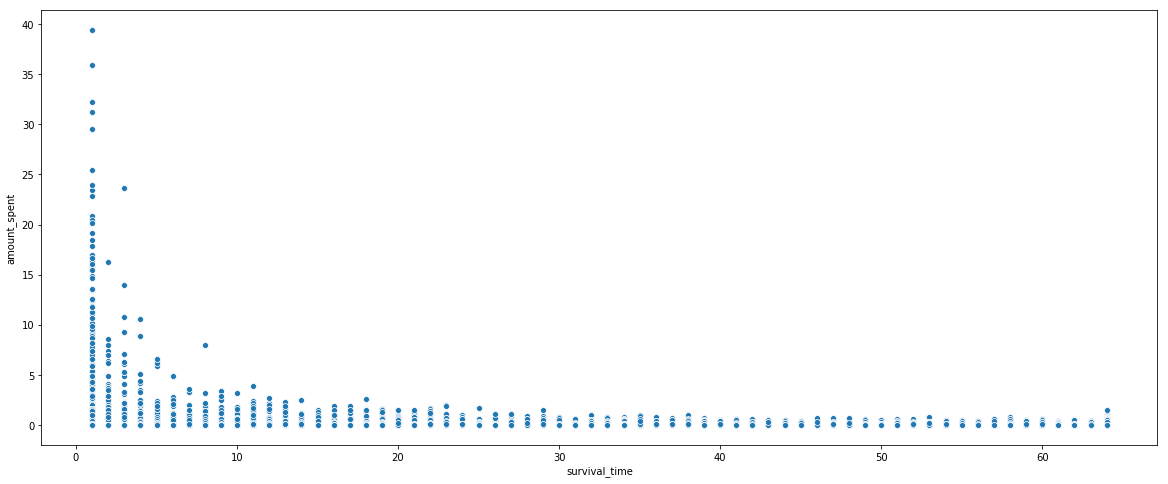

In [0]:
plt.figure(figsize=(20, 8))
sns.scatterplot(train_label['survival_time'], train_label['amount_spent'])

In [0]:
path = 'drive/My Drive/bigcontest2019/scripts'
os.chdir(path)
from model.metrics import score_function

FileNotFoundError: ignored

In [0]:
oof1_df2 = oof1_df.copy()
oof1_df2['amount_spent'] = oof1_df2['amount_spent']*70
oof1_df2.loc[(oof1_df2['survival_time']>7) & (oof1_df2['survival_time']<64), 'survival_time'] = 35
score_function.score_function(oof1_df2, train_label, path=False) # mape : 25324.18911194569

20320.16831011128


20320.16831011128

In [0]:
train_label2 = train_label.copy()
train_label2.loc[train_label2['survival_time']>7, 'survival_time'] = 64

In [0]:
score_function.score_function(train_label2, train_label, path=False)
# mape : 56281.93961878003

56281.93961878003


56281.93961878003

In [0]:
pred1_df = pd.DataFrame([np.unique(test1_activity['acc_id']), pred1_time.astype(int), pred1_spent]).T
pred1_df.columns = train_label.columns
pred1_df[['acc_id', 'survival_time']] = pred1_df[['acc_id', 'survival_time']].astype(int)

pred1_df.loc[pred1_df['survival_time']<1, 'survival_time'] = 1
pred1_df.loc[pred1_df['survival_time']>64, 'survival_time'] = 64

# pred1_df.loc[(pred1_df['survival_time']>7) & (pred1_df['survival_time']<64), 'survival_time'] = 30
pred1_df.loc[pred1_df['amount_spent']<0, 'amount_spent']=0

pred1_df['amount_spent'] = pred1_df['amount_spent']*20

pred1_df.to_csv('/content/test1_predict.csv', index=False, encoding='utf-8')

In [0]:
pred2_time, pred2_spent = lgb_model(train_activity_merge, test2_activity_merge, train_label.sort_values('acc_id').reset_index(drop=True), FOLDS, SEED)

Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[595]	training's rmse: 13.0762	valid_1's rmse: 17.8931
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[349]	training's rmse: 13.8865	valid_1's rmse: 18.313
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[420]	training's rmse: 13.6981	valid_1's rmse: 17.8818
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[764]	training's rmse: 12.6094	valid_1's rmse: 17.8254
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[506]	training's rmse: 13.324	valid_1's rmse: 18.1785
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[114]	training's rmse: 0.712953	valid_1's rmse: 0.544113
Training until validation scores don't improve for 500 rounds.
Early stopping, bes

In [0]:
pred1_df = pd.DataFrame([np.unique(test1_activity['acc_id']), pred1_time.astype(int), pred1_spent]).T
pred1_df.columns = train_label.columns
pred1_df[['acc_id', 'survival_time']] = pred1_df[['acc_id', 'survival_time']].astype(int)

pred2_df = pd.DataFrame([np.unique(test2_activity['acc_id']), pred2_time.astype(int), pred2_spent]).T
pred2_df.columns = train_label.columns
pred2_df[['acc_id', 'survival_time']] = pred2_df[['acc_id', 'survival_time']].astype(int)

In [0]:
pred1_df.loc[pred1_df['survival_time']<1, 'survival_time'] = 1
pred2_df.loc[pred2_df['survival_time']<1, 'survival_time'] = 1
pred1_df.loc[pred1_df['survival_time']>64, 'survival_time'] = 64
pred2_df.loc[pred2_df['survival_time']>64, 'survival_time'] = 64

pred1_df.loc[(pred1_df['survival_time']>7) & (pred1_df['survival_time']<64), 'survival_time'] = 30
pred2_df.loc[(pred2_df['survival_time']>7) & (pred2_df['survival_time']<64), 'survival_time'] = 30

pred1_df.loc[pred1_df['amount_spent']<0, 'amount_spent']=0
pred2_df.loc[pred2_df['amount_spent']<0, 'amount_spent']=0

pred1_df['amount_spent'] = pred1_df['amount_spent']*20
pred2_df['amount_spent'] = pred2_df['amount_spent']*20

pred1_df.to_csv('/content/test1_predict.csv', index=False, encoding='utf-8')
pred2_df.to_csv('/content/test2_predict.csv', index=False, encoding='utf-8')

# train, test split

In [0]:
skf = StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)
for trn_idx, val_idx in skf.split(train_label, y=train_label['survival_time']):
    train_df = train_label.loc[trn_idx]
    valid_df = train_label.loc[val_idx]
    break

# modeling

In [0]:
trn_activity = train_activity.loc[train_activity['acc_id'].isin(train_df['acc_id']), ['day', 'acc_id', 'playtime']]
val_activity = train_activity.loc[train_activity['acc_id'].isin(valid_df['acc_id']), ['day', 'acc_id', 'playtime']]

In [0]:
trn_activity = trn_activity.groupby(['acc_id', 'day']).sum().unstack()
val_activity = val_activity.groupby(['acc_id', 'day']).sum().unstack()

In [0]:
trn_activity.columns = trn_activity.columns.droplevel(0)
val_activity.columns = val_activity.columns.droplevel(0)

In [0]:
trn_activity = trn_activity.reset_index()
val_activity = val_activity.reset_index()

In [0]:
train_df = train_df.reset_index(drop=True)
valid_df = valid_df.reset_index(drop=True)
train_df = pd.merge(train_df, trn_activity.fillna(0), how='left', on='acc_id')
valid_df = pd.merge(valid_df, val_activity.fillna(0), how='left', on='acc_id')

In [0]:
rf_survival = RandomForestRegressor(n_estimators=500, random_state=SEED)
rf_spent = RandomForestRegressor(n_estimators=500, random_state=SEED)

In [0]:
rf_survival.fit(train_df.iloc[:, 3:], train_df['survival_time'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
rf_spent.fit(train_df.iloc[:, 3:], train_df['amount_spent'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

# inference

In [0]:
survival_inference = rf_survival.predict(valid_df.iloc[:, 3:])
spent_inference = rf_spent.predict(valid_df.iloc[:, 3:])

In [0]:
survival_inference = np.round(survival_inference, 0)
predict_df = pd.DataFrame(np.concatenate([valid_df['acc_id'].values.reshape(-1, 1), survival_inference.reshape(-1, 1), spent_inference.reshape(-1, 1)], axis=1), columns=valid_df.columns[:3])

In [0]:
output_path = 'drive/My Drive/bigcontest2019/metrics/lhh_inference/'

In [0]:
valid_df.iloc[:, :3].to_csv(output_path+'true.csv', index=False)
predict_df.to_csv(output_path+'predict.csv', index=False)